# Heart Disease Prediction using SVM

## **Problem Statement**

Cardiovascular diseases are the leading cause of death globally. Early detection of heart disease can significantly improve patient outcomes and reduce mortality rates.

### Objective

Develop a **Support Vector Machine (SVM)** classifier to predict the presence of heart disease in patients based on their medical attributes.

### Task

Given patient medical records with 13 health parameters, predict:
- **0**: No heart disease
- **1**: Heart disease present

### Goals

- Build and optimize an SVM model with different kernels (Linear, RBF, Polynomial)
- Analyze feature importance and key risk factors
- Deploy an interactive Streamlit web application for real-time predictions
- Achieve high accuracy with proper handling of class imbalance

---

**Disclaimer**: For educational purposes only. Not a substitute for professional medical diagnosis.

In [338]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn  as sns

# **EDA**

**1-Loading the dataset**

In [339]:
print("="*60)
print("HEART DISEASE DATASET - EXPLORATORY DATA ANALYSIS")
print("="*60)
df = pd.read_csv('heart.csv')
df.head()

HEART DISEASE DATASET - EXPLORATORY DATA ANALYSIS


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [340]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


**2-Basic Info**

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [342]:
df.shape

(1025, 14)

**3-Checking for missing values**

In [343]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**4-Checking for duplicates**

In [344]:
duplicates = df.duplicated().sum()
print(f"Number of Duplicates: {duplicates}")

Number of Duplicates: 723


**5-Target Values Distribution**

In [345]:
print(df['target'].value_counts())
print("\nPercentage:")
print(df['target'].value_counts(normalize=True) * 100)

target
1    526
0    499
Name: count, dtype: int64

Percentage:
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12468\773521056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


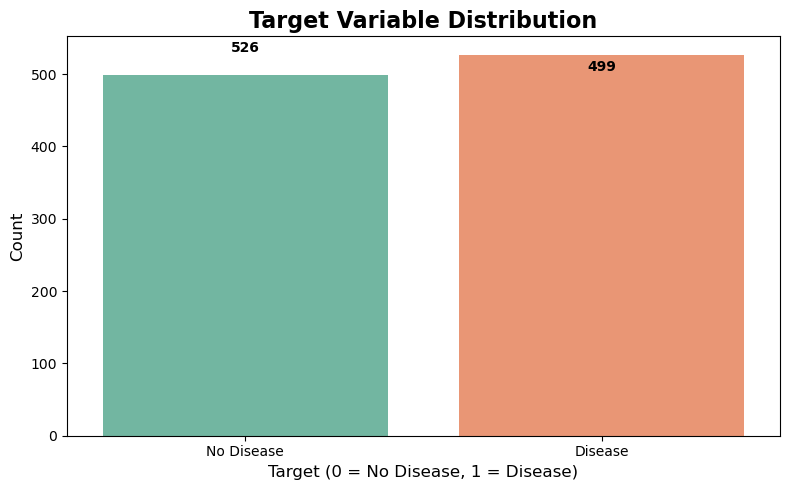

In [346]:
# Plot target distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Target Variable Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Disease', 'Disease'])
for i, v in enumerate(df['target'].value_counts()):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
    
plt.tight_layout()
plt.show()# Plot target distribution


**6-Feature Distribution**

In [347]:
numerical_features = [col for col in df.select_dtypes(include=[np.number]).columns if df[col].nunique()>10 and col != 'target']
print("Numerical Features:", numerical_features)

Numerical Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


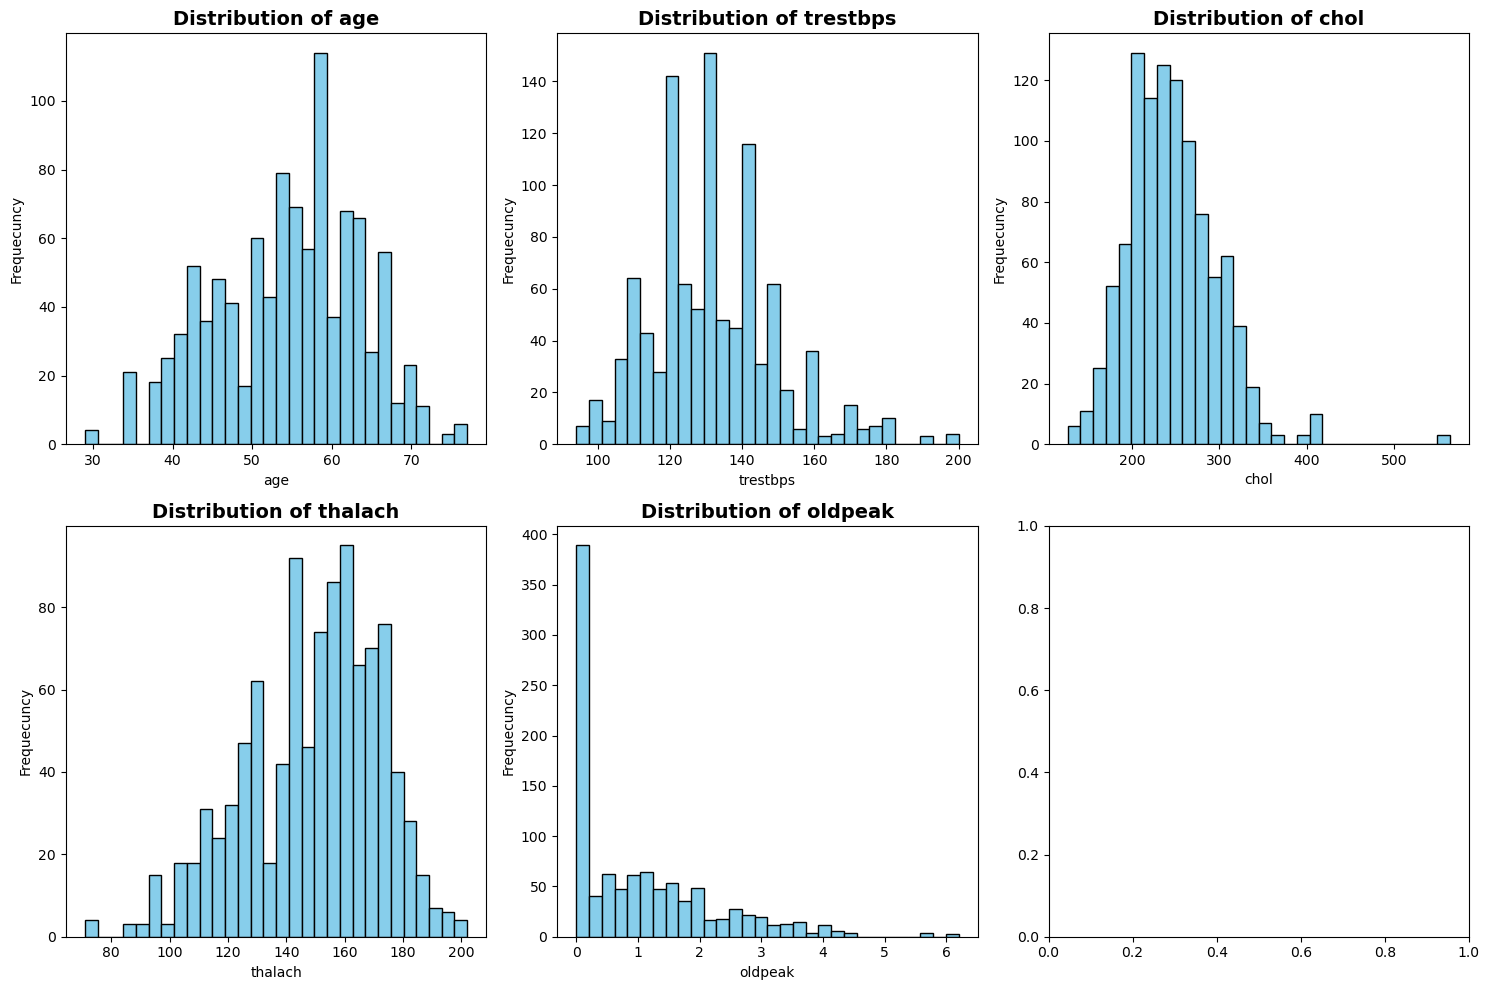

In [348]:
fig, axes = plt.subplots(2,3,figsize=(15,10))
axes = axes.flatten()


for i,col in enumerate(numerical_features):
    axes[i].hist(df[col],bins=30,color='skyblue',edgecolor='black')
    axes[i].set_title(f'Distribution of {col}',fontsize=14,fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequecuncy')

plt.tight_layout()
plt.show()

**7-Categorical Feature Analysis**


Feature Importance/Pattern Discovery/Feature Selection/Data Understanding

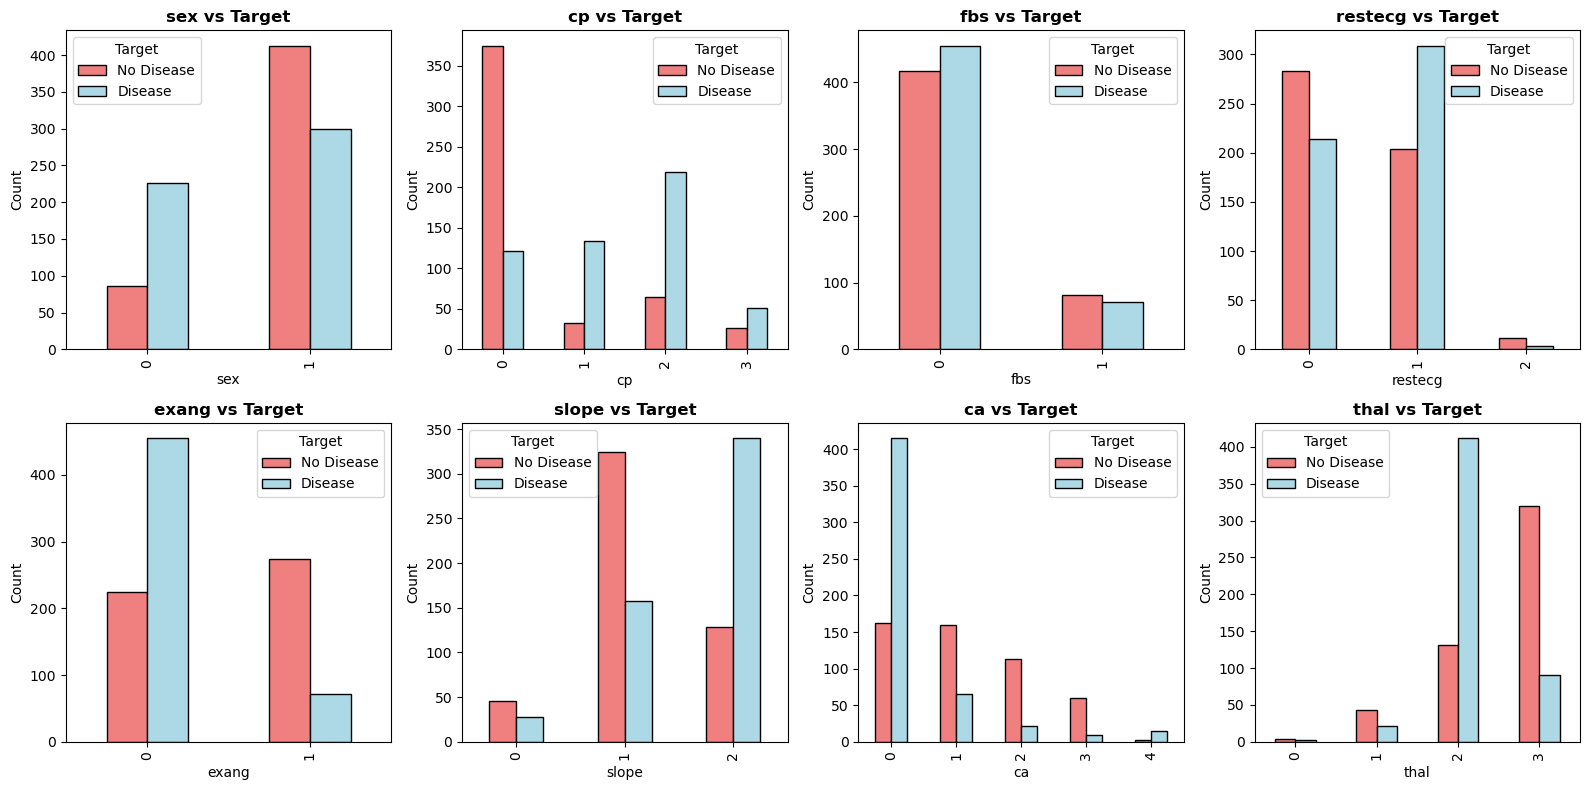

In [349]:
categorical_features = [col for col in df.select_dtypes(include=[np.number]).columns if df[col].nunique()<=10 and col != 'target']

fig, axes = plt.subplots(2,4,figsize=(16,8))
axes = axes.flatten()


for i,col in enumerate(categorical_features):
    df_grouped = df.groupby([col,"target"]).size().unstack()
    df_grouped.plot(kind='bar',ax=axes[i],color=['lightcoral','lightblue'],edgecolor='black')
    axes[i].set_title(f'{col} vs Target',fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target',labels=['No Disease','Disease'])

plt.tight_layout()
plt.show()

**8-Co-relation analysis**

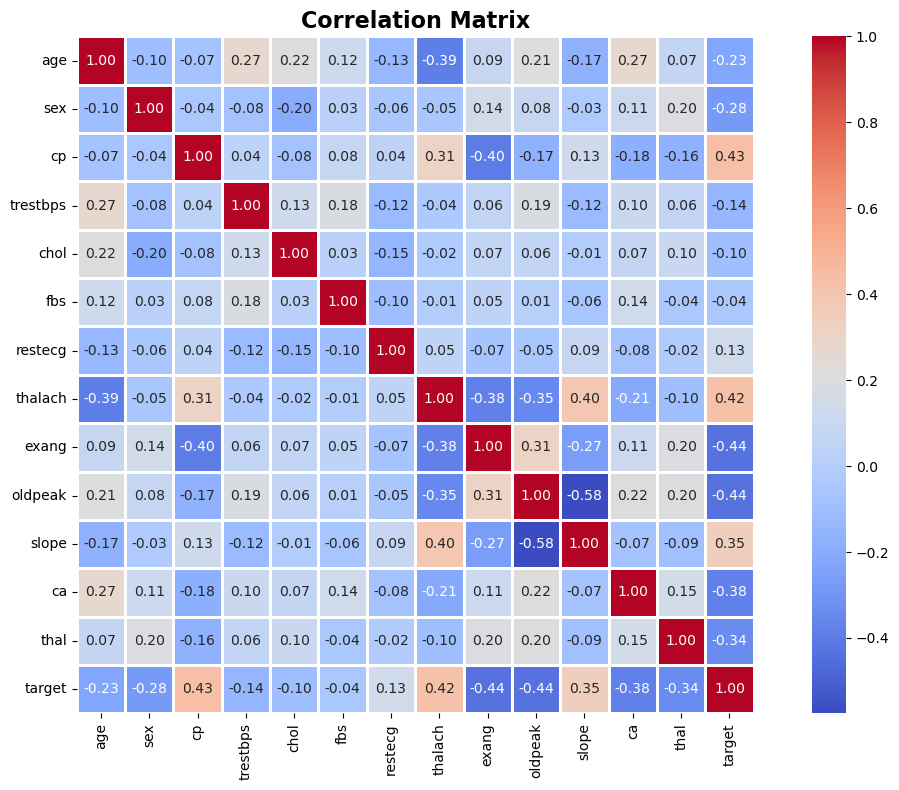

In [350]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=1,square=True)
plt.title('Correlation Matrix',fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()

- Don't remove features just because correlation with target is low.
- Only remove if:
  - Two features are highly correlated (|corr| > 0.8), **and**
  - One adds no new information (decide using VIF or domain knowledge).

**Checking multicolinearity**

In [351]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

#  Select all features except the target
X = df.drop(columns=['target'])   # replace 'target' with your actual target column name if different

#  Add constant column (required for VIF)
X = add_constant(X)

#  Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#  Display result
print(vif_data)



     Feature         VIF
0      const  207.966728
1        age    1.428872
2        sex    1.155948
3         cp    1.293277
4   trestbps    1.167890
5       chol    1.146047
6        fbs    1.090063
7    restecg    1.064442
8    thalach    1.615182
9      exang    1.419047
10   oldpeak    1.708555
11     slope    1.643092
12        ca    1.197065
13      thal    1.137680


### Multicollinearity Check
To ensure no strong correlation among independent variables, VIF values were computed.  
All features had VIF < 2, indicating **no significant multicollinearity**, so all were retained.
z

**9-OUTLIER DETECTION**

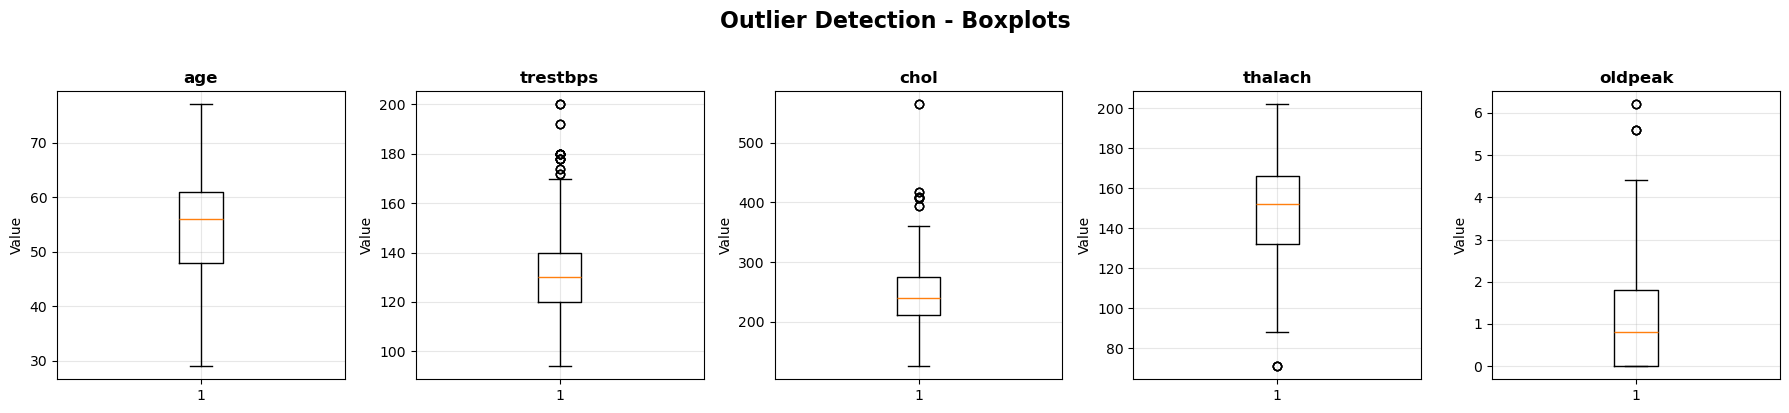

In [352]:
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for i, col in enumerate(numerical_features):
    axes[i].boxplot(df[col], vert=True)
    axes[i].set_title(f'{col}', fontweight='bold')
    axes[i].set_ylabel('Value')
    axes[i].grid(alpha=0.3)

plt.suptitle('Outlier Detection - Boxplots', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [353]:
# Statistical outlier detection
print("\nOutliers using IQR method:")
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


Outliers using IQR method:
age: 0 outliers (0.00%)
trestbps: 30 outliers (2.93%)
chol: 16 outliers (1.56%)
thalach: 4 outliers (0.39%)
oldpeak: 7 outliers (0.68%)


# **EDA Summary – Heart Disease Dataset**

- Dataset: 1025 rows, 14 columns (13 features + 1 target)  
- Missing values: None  
- Duplicates: 723, retained  
- Numerical & categorical features analyzed, distributions visualized  
- Outliers detected via IQR but retained (clinically relevant)  
- Correlation and VIF checked → no multicollinearity  
- **Decision:** All features retained; dataset clean and ready for modeling


# **Data Preprocessing**


In [354]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [355]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Data Transformation**

In [356]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Splitting**

In [357]:
X = df.drop(columns=['target'],axis=1)
y = df['target']
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [358]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

**Feature Scaling**

In [359]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head() 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


# **Model Selection**

In [360]:
# Select continuous numerical features (avoid too many for clarity)
key_features = [col for col in df.select_dtypes(include=[np.number]).columns 
                if df[col].nunique() > 10 and col != 'target'][:5]  # Top 5 continuous

In [361]:
key_features.append('target')

In [362]:
df_subset = df[key_features].copy()

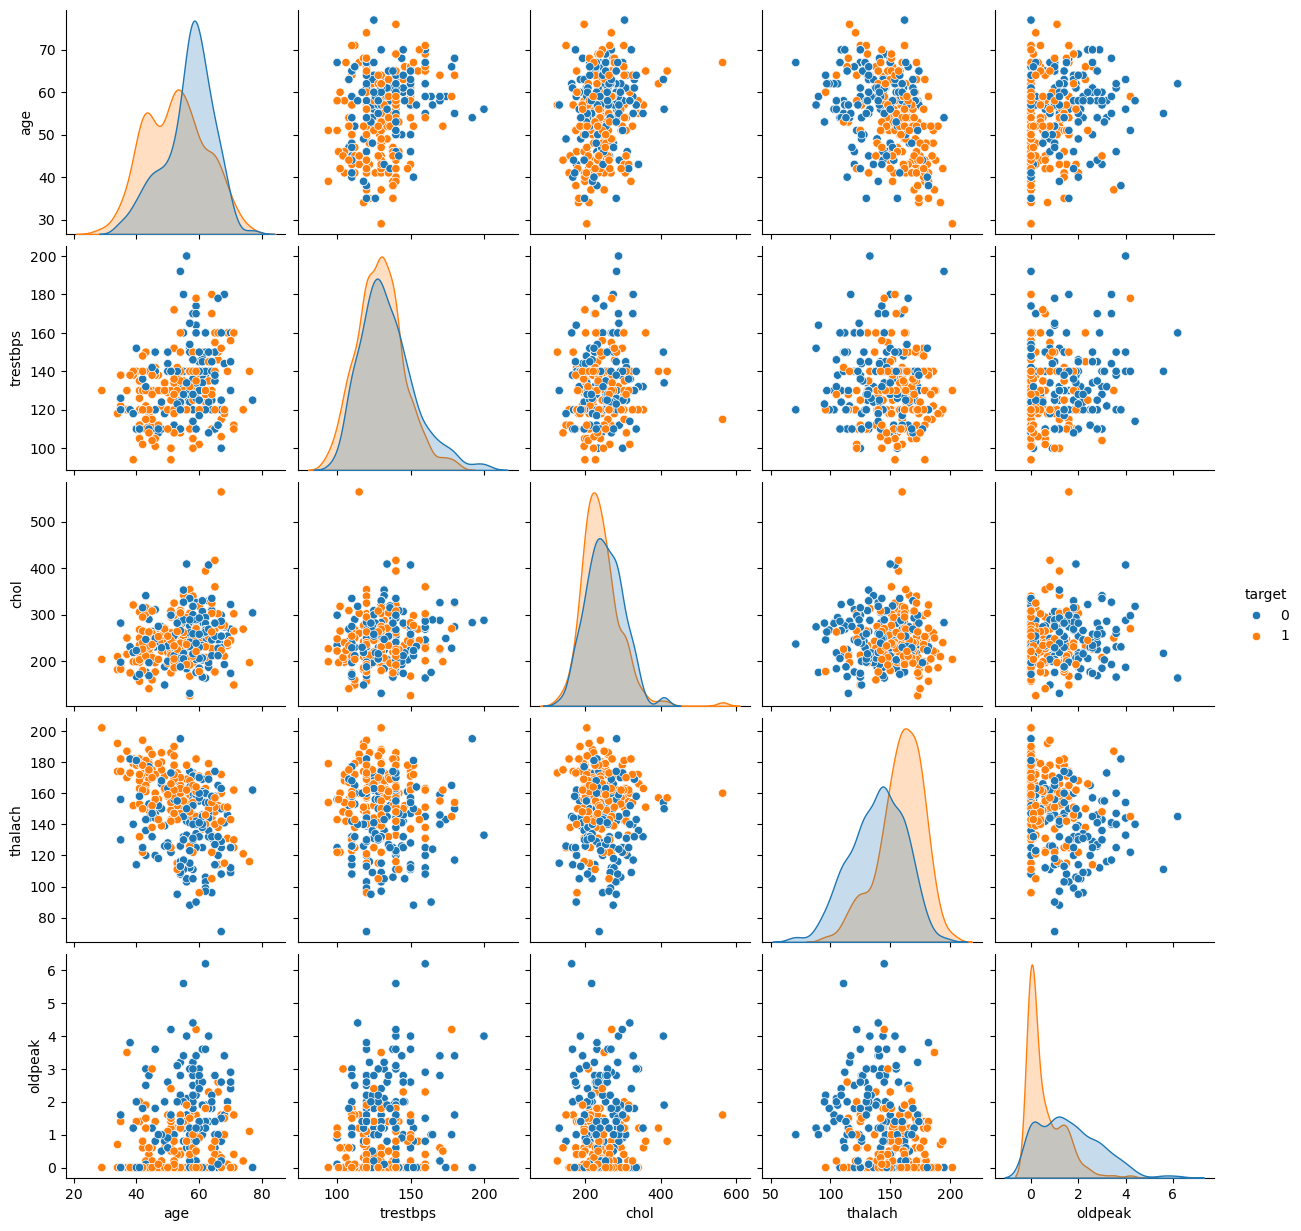

In [363]:
sns.pairplot(df_subset, hue='target')

**The pairplot shows overlapping class distributions with no clear linear separation, indicating non-linear relationships. Hence, an SVM model with kernel functions (RBF, Polynomial) is suitable to capture complex patterns and maximize class separation.**

# **Model Training**

In [364]:
print('='*60)
print("Import required libraries")
print('='*60)

Import required libraries


In [365]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [366]:
print('='*60)
print("Split data into training and testing sets")
print('='*60)

Split data into training and testing sets


In [367]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [368]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for k in kernels:
    model = SVC(kernel=k, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append((k, scores.mean()))

In [369]:
# Store results
df_results = pd.DataFrame(results, columns=['Kernel', 'CV_Accuracy']).sort_values(by='CV_Accuracy', ascending=False)
print("Cross-Validation Results:")
print(df_results)

Cross-Validation Results:
    Kernel  CV_Accuracy
1     poly     0.913415
2      rbf     0.912195
0   linear     0.856098
3  sigmoid     0.791463


In [370]:
best_kernel = df_results.iloc[0, 0]
print("\n Best Kernel Selected:", best_kernel)

final_model = SVC(kernel=best_kernel, random_state=42)
final_model.fit(X_train, y_train)


 Best Kernel Selected: poly


,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [372]:
y_pred = final_model.predict(X_test)

print("\n Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Test Accuracy: 0.926829268292683

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       100
           1       0.89      0.97      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205


 Confusion Matrix:
 [[ 88  12]
 [  3 102]]


**We are going to use Decision Tree model to identify the most important features since SVM does not provide feature importance scores directly. The top-ranked features are then used to retrain the SVM model, reducing input complexity while maintaining high performance.**

In [374]:
from sklearn.tree import DecisionTreeClassifier

In [375]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

In [377]:
# Select top N features (you can adjust 6 → 5, 7, etc.)
top_features = importances.head(9).index.tolist()
print("Top Selected Features:", top_features)# Select top N features (you can adjust 6 → 5, 7, etc.)


Top Selected Features: ['cp', 'ca', 'age', 'chol', 'thal', 'oldpeak', 'trestbps', 'thalach', 'slope']


In [378]:
# Reduce data
X_train_sel = X_train[top_features]
X_test_sel = X_test[top_features]# Reduce data
X_train_sel = X_train[top_features]
X_test_sel = X_test[top_features]

In [379]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_sel, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# **Evaluation**

In [380]:
# Predict
y_pred_sel = svm_model.predict(X_test_sel)

In [381]:
print("\n Test Accuracy:", accuracy_score(y_test, y_pred_sel))
print("\n Classification Report:\n", classification_report(y_test, y_pred_sel))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sel))


 Test Accuracy: 0.9024390243902439

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90       100
           1       0.88      0.94      0.91       105

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205


 Confusion Matrix:
 [[86 14]
 [ 6 99]]


**Feature selection was done to simplify the web app and improve usability.
Using 9 key features preserved ~90% accuracy, balancing performance and user convenience**

**Checking Overfitting and Underfitting**

In [382]:
# Accuracy for 9-feature model
train_acc = svm_model.score(X_train_sel, y_train)
test_acc  = svm_model.score(X_test_sel, y_test)

print("Train Accuracy:", train_acc * 100)
print("Test Accuracy :", test_acc * 100)

Train Accuracy: 92.8048780487805
Test Accuracy : 90.2439024390244


# **Visualization of Results**

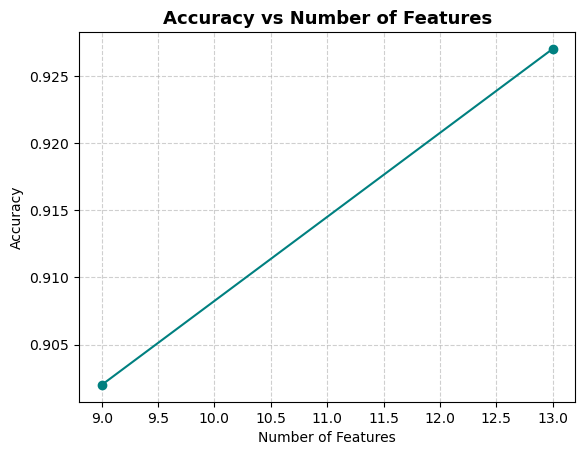

In [383]:
# 1️⃣ Accuracy Comparison
feature_counts = [13, 9]
accuracies = [0.927, 0.902]

plt.plot(feature_counts, accuracies, marker='o', color='teal')
plt.title("Accuracy vs Number of Features", fontsize=13, fontweight='bold')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

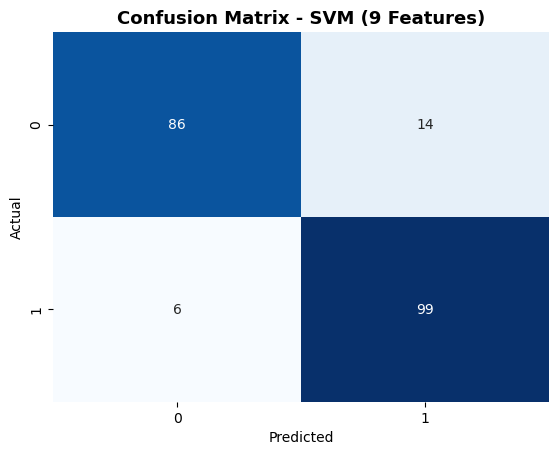

In [384]:
cm = confusion_matrix(y_test, y_pred_sel)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - SVM (9 Features)", fontsize=13, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Saving the Model**

In [385]:
import joblib
# Save the trained model
joblib.dump(svm_model, "heart_model.pkl")

['heart_model.pkl']

## **Final Conclusion**

The SVM model successfully predicts heart disease with high accuracy after proper preprocessing, scaling, and feature selection.  
Although the full feature set gave slightly higher performance, reducing to 9 key features made the model more practical for deployment and easier for users without sacrificing much accuracy.  
This project demonstrates how data analysis and machine learning can support better medical decision-making.
